In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
import sys
sys.path.insert(0, 'drive/uygulama')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [16]:
import pandas as pd

data = pd.read_pickle(r'/content/drive/My Drive/Colab Notebooks/data0.pickle')

In [17]:
from keras.utils.np_utils import to_categorical

# Preparing y_train and y_validation for using in Keras
data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)
data['y_test'] = to_categorical(data['y_test'], num_classes=43)

In [18]:
# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

In [13]:
# Showing loaded data from file
for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)

x_test: (12630, 32, 32, 3)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
labels: 43
x_train: (86989, 32, 32, 3)
y_test: (12630, 43)
y_train: (86989, 43)


In [14]:
print(data["x_train"][44].shape)

(32, 32, 3)


In [19]:
print(object["labels"][3])

Speed limit (60km/h)


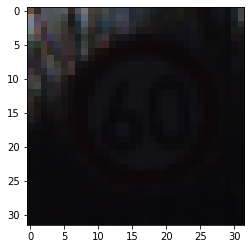

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(object["x_train"][44].astype(np.uint8));

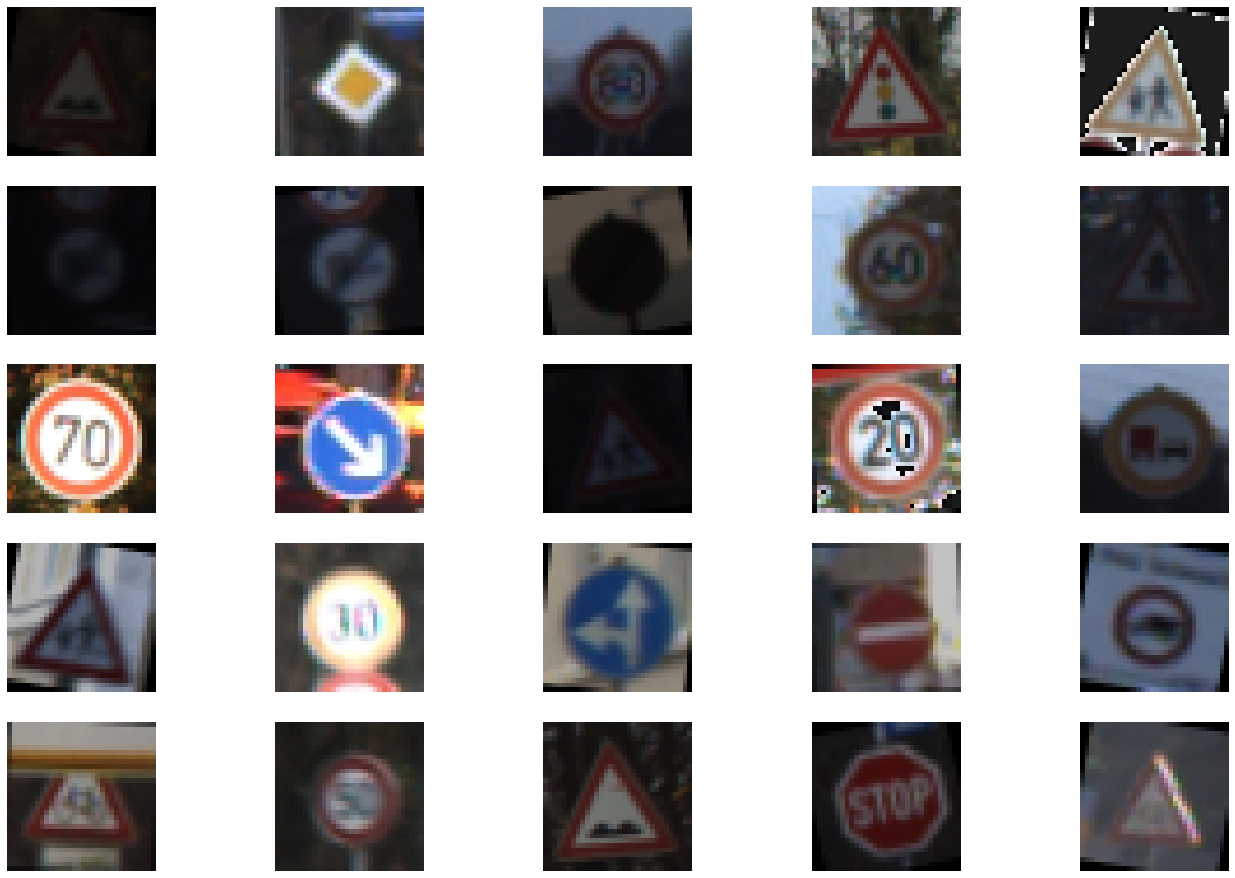

In [21]:
from random import randint

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(object["x_train"]))
        ax[i,j].imshow(object["x_train"][rnd_number])
        #ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [22]:
import tensorflow.keras.models as Models
import tensorflow.keras.layers as Layers
import tensorflow.keras.optimizers as Optimizer


model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3), padding="same", activation='relu',input_shape=(32,32,3)))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3), padding="same",activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3), padding="same",activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3), padding="same",activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3), padding="same",activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(43,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 200)       5600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 200)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 180)         324180    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 140)         226940    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 100)         126100    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 50)          45050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 50)          0

In [25]:
trained = model.fit(data["x_train"], data["y_train"], batch_size = 256, epochs=35, validation_data= (data['x_validation'], data['y_validation']))

Epoch 1/35
340/340 [==============================] - 10s 30ms/step - loss: 3.4637 - accuracy: 0.1032 - val_loss: 2.7128 - val_accuracy: 0.2961
Epoch 2/35
340/340 [==============================] - 9s 28ms/step - loss: 2.5858 - accuracy: 0.3156 - val_loss: 1.9153 - val_accuracy: 0.4943
Epoch 3/35
340/340 [==============================] - 10s 28ms/step - loss: 1.8998 - accuracy: 0.4836 - val_loss: 1.4948 - val_accuracy: 0.5771
Epoch 4/35
340/340 [==============================] - 10s 28ms/step - loss: 1.4356 - accuracy: 0.6036 - val_loss: 1.2057 - val_accuracy: 0.6957
Epoch 5/35
340/340 [==============================] - 10s 28ms/step - loss: 1.1262 - accuracy: 0.6828 - val_loss: 0.9840 - val_accuracy: 0.7560
Epoch 6/35
340/340 [==============================] - 10s 28ms/step - loss: 0.8919 - accuracy: 0.7458 - val_loss: 0.8834 - val_accuracy: 0.7685
Epoch 7/35
340/340 [==============================] - 10s 29ms/step - loss: 0.7348 - accuracy: 0.7906 - val_loss: 0.8617 - val_accuracy: 

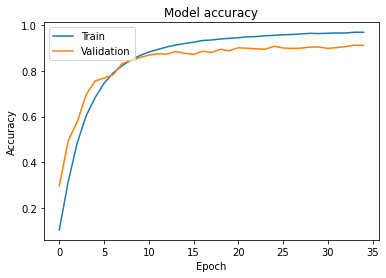

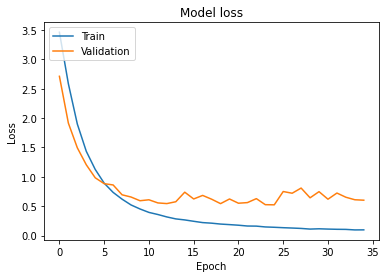

In [26]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
model.evaluate(data["x_test"], data["y_test"], verbose=1)

395/395 [==============================] - 2s 4ms/step - loss: 0.6776 - accuracy: 0.9044


[0.6775991320610046, 0.9044339060783386]